# **GeoPandas** **101**
**Author** : Sakarat Sooksang <br>
**My GitHub** : <a href=https://github.com/sakaratsooksang/Pandas101bySKR>GitHub repository</a><br>
Clone : https://github.com/sakaratsooksang/Pandas101bySKR.git

# Install Package

In [ ]:
! pip install pyproj
! pip install geopandas

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

ทำการอ่านตัวอย่าง Dataset สำหรับ Geodataframe ที่มีให้สำหรับการฝึกใช้งาน

In [7]:
path_to_data = gpd.datasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [13]:
gdf = gdf.set_index("BoroName")

In [16]:
gdf["area"] = gdf.area
gdf['boundary'] = gdf.boundary
gdf['centroid'] = gdf.centroid
# ทำการสร้าง column area boundary และ Centroid  เพิ่มและทำการนำพื้นที่ของแต่ละ object ใส่เข้าไป
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,area,boundary,centroid
BoroName,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991)
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604)
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761)
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437)
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980)


คำนวณระยะทางว่าระยะทางของจุดต่าง ๆ ห่างจาก centroid ของ Staten Island เท่าใด

In [48]:
first_point = gdf['centroid'].loc['Staten Island']
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

เราสามารถทำการ Plot dataframe หรือ Geodataframe ได้ด้วยคำสั่ง plot

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

<Figure size 432x288 with 0 Axes>

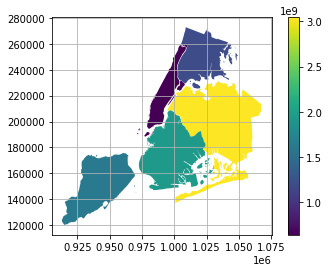

In [25]:
plt.figure('GeoDataframe plot')
gdf.plot('area',legend=True)
plt.grid()
plt.imshow

สามารถใช้ข้อมูล Attribute ในการสร้าง classify สีไปตาม value ได้

ในเมื่อตอนนี้เรามีหลาย Geometry ใน Geodataframe ของเรา <br>เราสามารถที่จะทำการset geometry เป็นอย่างอื่นได้ เช่นเปลี่ยนจาก Geom เป็น centroid

In [32]:
gdf.set_geometry('centroid')

,BoroCode,Shape_Leng,Shape_Area,geometry,area,boundary,centroid
BoroName,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991)
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604)
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761)
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437)
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980)


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

<Figure size 432x288 with 0 Axes>

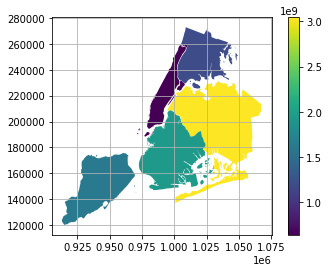

In [84]:
plt.figure('Centroid plot')
gdf.plot('area',legend=True)
plt.grid()
plt.imshow

อีกทั้งเรายังสามารถ Plot ทั้งคู่พร้อมกันได้โดยทำการ plot ดังนี้

<AxesSubplot:>

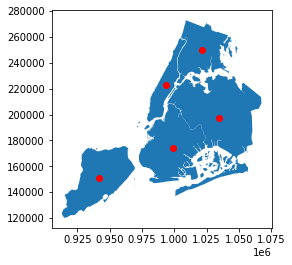

In [41]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="red")

ตั้ง geometry กลับเป็น geometry 

In [40]:
gdf = gdf.set_geometry("geometry")

# Convex hull คือการหาขอบเขตของเซ็ตข้อมูล

<AxesSubplot:>

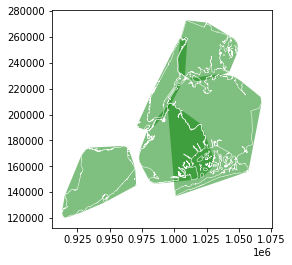

In [47]:
gdf["convex_hull"] = gdf.convex_hull
ax = gdf["convex_hull"].plot(color='green',alpha=.5)  
# saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)  
# passing the first plot and setting linewitdth to 0.5

# การสร้าง Buffer

In [49]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10000)
# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10000)

เป็นการสร้าง Buffer ออกไปจาก Boundary เป็นระยะ 10000<br>
และจากนั้นทำการสร้าง Buffer จากจุด Centroid เป็นระยะ 10000 <br>
และทำการ Save first plot ใน ax(axis) และทำการ plot ข้อมูลเพิ่มเติมลงบน ax(axis)

<AxesSubplot:>

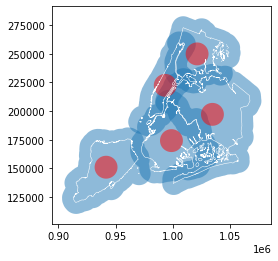

In [60]:
ax = gdf["buffered"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=.5)  # passing the first plot as an axis to the second
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

เราสามารถดึง Polygon ของพื้นที่มาเก็บไว้ในตัวแปรได้เช่นกัน

In [94]:
type(gdf['buffered'])

geopandas.geoseries.GeoSeries

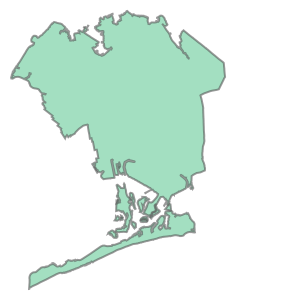

In [96]:
queens = gdf.loc["Queens", "geometry"]
queens

In [64]:
type(queens)

shapely.geometry.multipolygon.MultiPolygon

เราสามารถตรวจสอบได้ว่า Polygon ของเรา intersect กับ object อื่นได้หรือไม่โดยใช้คำสั่ง intersects
<br>
ในที่นี้จะตรวจสอบว่า รัฐ queens ของเรา intersect กับ buffer จากเมืองใดบ้าง

<AxesSubplot:>

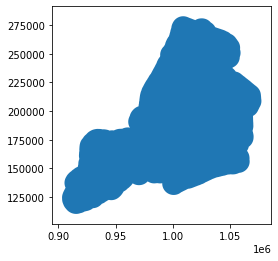

In [66]:
gdf["buffered"].plot()

In [103]:
gdf["buffered"]

BoroName
Staten Island    POLYGON ((903234.894 123347.784, 903178.057 12...
Queens           POLYGON ((1066963.473 157602.686, 1067059.264 ...
Brooklyn         POLYGON ((962679.120 165570.385, 962651.330 16...
Manhattan        POLYGON ((980499.119 178448.735, 979864.868 17...
Bronx            POLYGON ((992724.911 240962.362, 992700.941 24...
Name: buffered, dtype: geometry

In [117]:
df_buf = gdf[["buffered",'BoroCode']]
print(type(df_buf))
#แปลงเป็น Geodataframe
gdf_buf = gpd.GeoDataFrame(df_buf,geometry='buffered')
print(type(gdf_buf))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


# Plot แสดงว่ารัฐ Queen ไป Intersect กับ Buffer จากรัฐใดบ้าง

<AxesSubplot:>

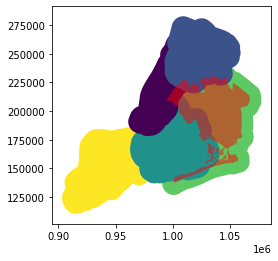

In [115]:
ax = gdf_buf.plot('BoroCode',alpha=1)
gdf[gdf.BoroCode.isin([4])].plot(ax=ax, color="red", alpha=.5)


ตรวจสอบการ Intersect ด้วย Function

In [119]:
gdf["buffered"].intersects(queens)

BoroName
Staten Island    False
Queens            True
Brooklyn          True
Manhattan         True
Bronx             True
dtype: bool

สร้าง dataframe ที่มีแต่เมืองที่ intersect

In [131]:
gdf[gdf["buffered"].intersects(queens)][['BoroCode','geometry']] #เลือกมาโชว์แค่สองคอลัมน์

,BoroCode,geometry
BoroName,,
Queens,4,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
Brooklyn,3,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
Manhattan,1,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
Bronx,2,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


เช็คว่า object อยู่ข้างใน polygon หรือไม่ ถ้ามีขนาดใหญ่กว่าหรือเหลื่อมออกมาเพียงเล็กน้อยก็ถือเป็นเท็จ

<AxesSubplot:>

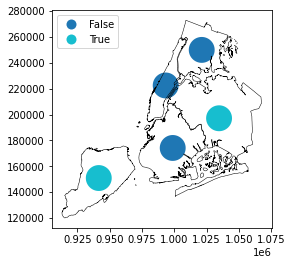

In [133]:
gdf = gdf.set_geometry("buffered_centroid")
ax = gdf.plot("within", legend=True, categorical=True, legend_kwds={'loc': "upper left"})  # using categorical plot and setting the position of the legend
gdf["boundary"].plot(ax=ax, color="black", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

In [132]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

BoroName
Staten Island     True
Queens            True
Brooklyn         False
Manhattan        False
Bronx            False
Name: within, dtype: bool

# Coordinate Reference system

In [136]:
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,area,boundary,centroid,convex_hull,distance,buffered,buffered_centroid,within
BoroName,,,,,,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991),"POLYGON ((915517.688 120121.881, 915467.035 12...",0.000000,"POLYGON ((903234.894 123347.784, 903178.057 12...","POLYGON ((951639.450 150931.991, 951591.298 14...",True
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604),"POLYGON ((1000721.532 136681.776, 994611.996 2...",103781.535276,"POLYGON ((1066963.473 157602.686, 1067059.264 ...","POLYGON ((1044578.078 197116.604, 1044529.926 ...",True
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761),"POLYGON ((988872.821 146772.032, 983670.606 14...",61674.893421,"POLYGON ((962679.120 165570.385, 962651.330 16...","POLYGON ((1008769.115 174169.761, 1008720.962 ...",False
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437),"POLYGON ((977855.445 188082.322, 971830.134 19...",88247.742789,"POLYGON ((980499.119 178448.735, 979864.868 17...","POLYGON ((1003336.965 222451.437, 1003288.812 ...",False
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980),"POLYGON ((1017949.978 225426.885, 1015563.562 ...",126996.283623,"POLYGON ((992724.911 240962.362, 992700.941 24...","POLYGON ((1031174.790 249937.980, 1031126.637 ...",False


In [137]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

เปลี่ยนแปลงระบบพิกัดโดย

In [141]:
utm_47n = gdf.to_crs('EPSG:24047')
utm_47n

,BoroCode,Shape_Leng,Shape_Area,geometry,area,boundary,centroid,convex_hull,distance,buffered,buffered_centroid,within
BoroName,,,,,,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991),"POLYGON ((915517.688 120121.881, 915467.035 12...",0.000000,"POLYGON ((903234.894 123347.784, 903178.057 12...","POLYGON ((-82618.404 15478866.832, -82627.593 ...",True
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604),"POLYGON ((1000721.532 136681.776, 994611.996 2...",103781.535276,"POLYGON ((1066963.473 157602.686, 1067059.264 ...","POLYGON ((-109837.478 15462513.135, -109846.73...",True
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761),"POLYGON ((988872.821 146772.032, 983670.606 14...",61674.893421,"POLYGON ((962679.120 165570.385, 962651.330 16...","POLYGON ((-99474.890 15470387.146, -99484.115 ...",False
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437),"POLYGON ((977855.445 188082.322, 971830.134 19...",88247.742789,"POLYGON ((980499.119 178448.735, 979864.868 17...","POLYGON ((-96638.590 15455793.418, -96647.880 ...",False
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980),"POLYGON ((1017949.978 225426.885, 1015563.562 ...",126996.283623,"POLYGON ((992724.911 240962.362, 992700.941 24...","POLYGON ((-104456.403 15446727.977, -104465.73...",False


In [146]:
utm_47n = utm_47n.set_geometry('geometry')

<AxesSubplot:>

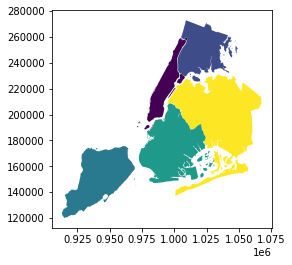

In [147]:
utm_47n.plot('area')

epsg:2263


<AxesSubplot:>

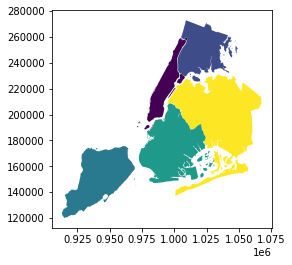

In [150]:
gdf = gdf.set_geometry('geometry')
print(gdf.crs)
gdf.plot('area')

การสร้างข้อมูล Geodataframe จากการอ่าน CSV

In [152]:
import pandas as pd

In [204]:
df = pd.read_csv('data_point.csv')
df.drop(['status','name_en'],axis=1,inplace=True)

In [205]:
df.dropna(inplace=True)
#กำจัดแถวที่ข้อมูลสูญหาย

In [225]:
df = df.loc[(df.lat<20.33)&(df.lon<105)&(df.lon>100)]

In [221]:
x = df.lon
y = df.lat

In [227]:
 point = gpd.points_from_xy(x,y)

In [228]:
df['Coordinate'] = point
df.drop(['lat','lon'],axis=1,inplace=True)

In [229]:
df

,gid,code,name,Coordinate
1,297,423,ขท.จันทบุรี,POINT (102.10461 12.61561)
2,355,639,ขท.มุกดาหาร,POINT (104.69186 16.52828)
3,259,622,ขท.มหาสารคาม,POINT (103.29074 16.20262)
4,412,638,ขท.ศรีสะเกษที่ 1,POINT (104.33350 15.09972)
5,411,636,ขท.ศรีสะเกษที่ 2,POINT (104.62944 15.85750)
...,...,...,...,...
686,1901,43206,หมวดทางหลวงแก่งคอย,POINT (101.03907 14.59572)
688,1822,51502,หมวดทางหลวงแก่งโสภา,POINT (100.77822 16.87199)
689,1235,62705,หมวดทางหลวงแก้งคร้อ,POINT (102.27786 16.07565)
690,1928,41903,หมวดทางหลวงแสมดำ,POINT (100.43551 13.65910)


# Create GeoDataFrame

In [230]:
gdf = gpd.GeoDataFrame(
    df,crs='EPSG:24047',geometry='Coordinate'
)

In [231]:
gdf

,gid,code,name,Coordinate
1,297,423,ขท.จันทบุรี,POINT (102.105 12.616)
2,355,639,ขท.มุกดาหาร,POINT (104.692 16.528)
3,259,622,ขท.มหาสารคาม,POINT (103.291 16.203)
4,412,638,ขท.ศรีสะเกษที่ 1,POINT (104.334 15.100)
5,411,636,ขท.ศรีสะเกษที่ 2,POINT (104.629 15.857)
...,...,...,...,...
686,1901,43206,หมวดทางหลวงแก่งคอย,POINT (101.039 14.596)
688,1822,51502,หมวดทางหลวงแก่งโสภา,POINT (100.778 16.872)
689,1235,62705,หมวดทางหลวงแก้งคร้อ,POINT (102.278 16.076)
690,1928,41903,หมวดทางหลวงแสมดำ,POINT (100.436 13.659)


<AxesSubplot:>

<Figure size 432x216 with 0 Axes>

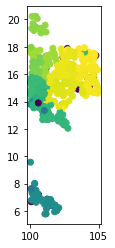

In [240]:
plt.figure(figsize=(6,3))
gdf.plot('code')